In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [2]:
image = cv2.imread("acc1 (13).jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
noisy_image = random_noise(image, mode='s&p')
noisy_image = (255 * noisy_image).astype(np.uint8)

## Filter

In [4]:
mean_filtered = cv2.blur(noisy_image, (5,5))
median_filtered = cv2.medianBlur(noisy_image, 5)
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5,5), 0)
bilateral_filtered = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)

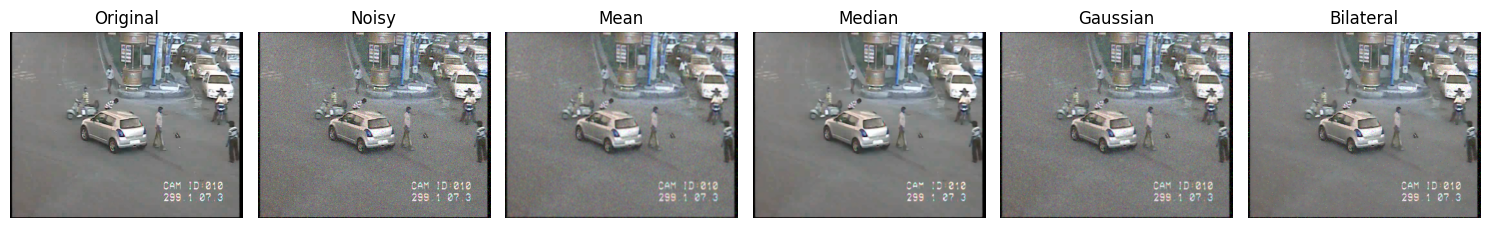

In [5]:
titles = ['Original', 'Noisy', 'Mean', 'Median', 'Gaussian', 'Bilateral']
images = [image, noisy_image, mean_filtered, median_filtered, gaussian_filtered, bilateral_filtered]

plt.figure(figsize=(15, 4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
def evaluate_metrics(original, filtered, name=""):
    psnr_val = peak_signal_noise_ratio(original, filtered)
    ssim_val = structural_similarity(original, filtered, channel_axis=-1)
    print(f"{name} -> PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}")
    return psnr_val, ssim_val

print("Evaluasi Metrik:")
evaluate_metrics(image, mean_filtered, "Mean Filter")
evaluate_metrics(image, median_filtered, "Median Filter")
evaluate_metrics(image, gaussian_filtered, "Gaussian Filter")
evaluate_metrics(image, bilateral_filtered, "Bilateral Filter")


Evaluasi Metrik:
Mean Filter -> PSNR: 26.59, SSIM: 0.7345
Median Filter -> PSNR: 30.91, SSIM: 0.9432
Gaussian Filter -> PSNR: 27.62, SSIM: 0.6692
Bilateral Filter -> PSNR: 24.36, SSIM: 0.6400


(np.float64(24.35981448222471), np.float64(0.6399596967135911))

### Diskusi dan Kesimpulan

Berdasarkan hasil evaluasi metrik:

- **Median Filter** sangat efektif untuk mengurangi noise tanpa menghilangkan detail yang banyak.
- **Bilateral Filter** mempertahankan tepi gambar lebih baik daripada Gaussian dan Mean filter.
- **Mean dan Gaussian Filter** mampu menghaluskan noise, tetapi cenderung mengaburkan tepi objek.